# Predicting credit risk score of customer with different Machine learning models 

In [474]:
#libraries
import os
import pandas as pd
import numpy as np
import pandas_profiling as pp
import datetime as dt

In [475]:
# Libraries for data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [476]:
#present directory
os.getcwd()

'C:\\Users\\Navi\\Desktop\\PHD'

# loading the data

In [477]:
#change of directory 
os.chdir("C:\\Users\\Navi\\Desktop\\PHD")

In [478]:
#loading train data 
train=pd.read_csv("train.csv")

In [479]:
#loading train_paymenthistory 
train_hist=pd.read_csv('Train_PaymentHistory.csv')

In [480]:
#print no of row and columns in traindata and train_hist 
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The train_hist data has {0} rows and {1} columns'.format(train_hist.shape[0],train_hist.shape[1]))

The train data has 11093 rows and 10 columns
----------------------------
The train_hist data has 269778 rows and 20 columns


In [481]:
#checking head of train 
train.head(5)

,Unnamed: 0,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
0,0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711
1,1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767
2,2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827
3,3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795
4,4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827


In [482]:
#checking the train_hist head
train_hist.head(5)

,Unnamed: 0,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Payment_Status
0,0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
1,1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
2,2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
3,3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
4,4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default


In [483]:
# checking no of unique nums in each columns
unique_counts = pd.DataFrame.from_records([(col, train[col].nunique()) for col in train.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
4,ProfessionalLicensure,2
6,eCommerceAccount,2
7,SocialMediaAccount,2
8,NoOfProperties,4
5,UtilitySpending,126
9,CreditRiskScore,481
2,DOB,708
3,Salary,8218
0,Unnamed: 0,11093
1,CustomerID,11093


# Groping the coustumerID in payment history with max Current_Instalment_Sequence

In [484]:
#grouping train_hist data with customer ID and with the help of agg function taking max curent instalment sequence  
df=train_hist.groupby("CustomerID", as_index=False).agg({"Current_Instalment_Sequence":"max"})

In [485]:
#checking the type of df  
type(df)

pandas.core.frame.DataFrame

In [486]:
#checking shape grouped data 
df.shape

(11093, 2)

In [487]:
# checking df
df.head()

,CustomerID,Current_Instalment_Sequence
0,C12116,48
1,C12117,34
2,C12118,60
3,C12119,60
4,C12120,60


# Merge df with train_hist with respect to customerID and Current_Instalment_Sequence


In [488]:
#mearging df with train_hist with customer id and current instalment sequence 

train_hist1=pd.merge(train_hist, df, on=('CustomerID','Current_Instalment_Sequence'), how='inner')

In [489]:
#cheacking shape of the train_hist1
train_hist1.shape

(11099, 20)

# merge train_hist and train with customerID to get finial train data

In [490]:
#final traindata
#mearging train and train_hist with common column customerid
train_final=pd.merge(train, train_hist1, on=('CustomerID'), how='inner')

In [491]:
#checking shape of train final data 
train_final.shape

(11099, 29)

In [492]:
#droping the unwanted column formed while mearging data 
train_final=train_final.drop(['Unnamed: 0_y','Unnamed: 0_x'],axis=1)

# Removing duplicates from data

In [493]:
#removing duplicates of same customer id from final train data
train_final.drop_duplicates(subset ="CustomerID",inplace=True) 

In [494]:
#checking shape of train data after removing dupilcates 
train_final.shape

(11093, 27)

In [495]:
#verifing the columns 
train_final.columns

Index(['CustomerID', 'DOB', 'Salary', 'ProfessionalLicensure',
       'UtilitySpending', 'eCommerceAccount', 'SocialMediaAccount',
       'NoOfProperties', 'CreditRiskScore', 'Current_Instalment_Sequence',
       'Starting_Instalment', 'Maturity_Period', 'Current_Outstanding',
       'Current_Loan_to_Appraisedvalu_Percent', 'CurrentInterestrate',
       'RealEstate_Current_Inflation', 'GDP', 'UnemploymentRate', 'Asset_type',
       'Urban_Development', 'Villa_House', 'Investment_SelfOccupied',
       'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent',
       'StartingInterestrate', 'RealEstate_Starting_Inflation',
       'Payment_Status'],
      dtype='object')

In [496]:
#droping customer id from train final data 
train_final= train_final.drop(['CustomerID'],axis=1)

In [497]:
#checking unique nums in each column of final train data set 
unique_counts = pd.DataFrame.from_records([(col, train_final[col].nunique()) for col in train_final.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
19,Villa_House,2
17,Asset_type,2
2,ProfessionalLicensure,2
20,Investment_SelfOccupied,2
4,eCommerceAccount,2
5,SocialMediaAccount,2
18,Urban_Development,2
25,Payment_Status,3
6,NoOfProperties,4
16,UnemploymentRate,31


# loading test data set

In [498]:
#loading teat data whis is inn ths form excel 
test=pd.read_excel("Test.xlsx")

In [499]:
#checking the shape of test
test.shape

(2774, 8)

In [500]:
#loaing test_histr in excel form 
test_hist=pd.read_excel('Test_hist.xlsx')

In [501]:
#checking head of test data
test.head(5)

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties
0,C41116,1973-04-21,1876.0,1,396.161956,1,Yes,1
1,C41117,1970-03-14,1261.0,0,195.604966,0,No,1
2,C41118,1981-01-03,1026.0,1,212.937051,0,Yes,2
3,C41119,1983-01-04,1384.0,0,396.161956,1,Yes,1
4,C41120,1979-03-16,1913.0,1,220.365088,1,Yes,2


In [502]:
#checking the test-hist head
test_hist.head(5)

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Payment_Status
0,C41116,25,25,119,61031.10,33.911009,10.500,2.2629,2.899137,4.7,No shred services,No,Yes,Self Occupancy,63750.0,81.8,10.5,0.9799,Non-Payoff/Non-Default
1,C41116,26,25,119,60882.42,34.007232,10.500,2.2510,2.151365,4.7,No shred services,No,Yes,Self Occupancy,63750.0,81.8,10.5,0.9799,Non-Payoff/Non-Default
2,C41116,27,25,119,60729.80,34.335349,10.500,2.2239,2.361722,4.4,No shred services,No,Yes,Self Occupancy,63750.0,81.8,10.5,0.9799,Non-Payoff/Non-Default
3,C41116,28,25,119,60576.14,34.672545,10.875,2.1967,1.229172,4.6,No shred services,No,Yes,Self Occupancy,63750.0,81.8,10.5,0.9799,Non-Payoff/Non-Default
4,C41116,29,25,119,60424.39,34.951639,10.875,2.1737,1.692969,4.5,No shred services,No,Yes,Self Occupancy,63750.0,81.8,10.5,0.9799,Non-Payoff/Non-Default


In [503]:
#checkng shape of test
test_hist.shape

(67621, 19)

In [504]:
#checking shape of test_hist 
test_hist.shape 

(67621, 19)

# Groping the coustumerID in payment history with max Current_Instalment_Sequence

In [505]:
# mearging df with train_hist with customer id and current instalment sequence 
df_test=test_hist.groupby("CustomerID", as_index=False).agg({"Current_Instalment_Sequence":"max"})

In [506]:
# checking shape of df_test after groupby
df_test.shape

(2774, 2)

In [507]:
# checing head of df_test
df_test.head(5)

,CustomerID,Current_Instalment_Sequence
0,C41116,60
1,C41117,60
2,C41118,60
3,C41119,60
4,C41120,60


In [508]:
# mearging df_test with test_hist with 2 columns customerid and curent instalment sequence 
test_hist1=pd.merge(df_test,test_hist, on=('CustomerID','Current_Instalment_Sequence'), how="inner")

In [509]:
# droping duplicates with customer id 
teat_hist1=test_hist1.drop_duplicates(subset ="CustomerID",inplace=True) 

In [510]:
# checking the shape of test_hist1
test_hist1.shape

(2774, 19)

In [511]:
#final mearge of test and test_hist with customer id 
test_final=pd.merge(test, test_hist1, on=('CustomerID'), how='inner')

In [512]:
# checking the shape of the final test data 
test_final.shape

(2774, 26)

In [513]:
# columns of finial test data 
test_final.columns

Index(['CustomerID', 'DOB', 'Salary', 'ProfessionalLicensure',
       'UtilitySpending', 'eCommerceAccount', 'SocialMediaAccount',
       'NoOfProperties', 'Current_Instalment_Sequence', 'Starting_Instalment',
       'Maturity_Period', 'Current_Outstanding',
       'Current_Loan_to_Appraisedvalu_Percent', 'CurrentInterestrate',
       'RealEstate_Current_Inflation', 'GDP', 'UnemploymentRate', 'Asset_type',
       'Urban_Development', 'Villa_House', 'Investment_SelfOccupied',
       'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent',
       'StartingInterestrate', 'RealEstate_Starting_Inflation',
       'Payment_Status'],
      dtype='object')

# Removing duplicates from data

In [514]:
# removing duplicates from final test data 
test_final.drop_duplicates(keep=False,inplace=True) 

In [515]:
# checking shape after removing final test data 
test_final.shape

(2774, 26)

# saving test final data set

In [516]:
# saving the final test data in xlsx formet
test_final.to_excel("test_final.xlsx", sheet_name='Sheet_name_1')

In [517]:
#droping customer id from final test data
test_final= test_final.drop(['CustomerID'],axis=1)

In [518]:
# checking shape after droping customer id  
test_final.shape

(2774, 25)

In [519]:
# checing shape of train final data beforing preprocing 
train_final.shape

(11093, 26)

# preprosicing steps

In [520]:
# using small loop converting some of the colums into catagory of train final data whose uniqe values  are less than 10 
for col in train_final [['Investment_SelfOccupied','ProfessionalLicensure','Urban_Development','eCommerceAccount','SocialMediaAccount','Asset_type','Villa_House','Payment_Status','NoOfProperties']]:
    train_final[col] = train_final[col].astype('category')

In [521]:
# using small loop converting some of the colums into catagory of test final data whose uniqe values  are less than 10
for col in test_final [['Investment_SelfOccupied','ProfessionalLicensure','Urban_Development','eCommerceAccount','SocialMediaAccount','Asset_type','Villa_House','Payment_Status','NoOfProperties']]:
    test_final[col] = test_final[col].astype('category')

In [522]:
# checking dtypes after converting cataory columns 
test_final.dtypes

DOB                                         object
Salary                                     float64
ProfessionalLicensure                     category
UtilitySpending                            float64
eCommerceAccount                          category
SocialMediaAccount                        category
NoOfProperties                            category
Current_Instalment_Sequence                  int64
Starting_Instalment                          int64
Maturity_Period                              int64
Current_Outstanding                        float64
Current_Loan_to_Appraisedvalu_Percent      float64
CurrentInterestrate                        float64
RealEstate_Current_Inflation               float64
GDP                                        float64
UnemploymentRate                           float64
Asset_type                                category
Urban_Development                         category
Villa_House                               category
Investment_SelfOccupied        

In [523]:
# checking dtypes after converting cataory columns 
train_final.dtypes

DOB                                         object
Salary                                     float64
ProfessionalLicensure                     category
UtilitySpending                            float64
eCommerceAccount                          category
SocialMediaAccount                        category
NoOfProperties                            category
CreditRiskScore                              int64
Current_Instalment_Sequence                  int64
Starting_Instalment                          int64
Maturity_Period                              int64
Current_Outstanding                        float64
Current_Loan_to_Appraisedvalu_Percent      float64
CurrentInterestrate                        float64
RealEstate_Current_Inflation               float64
GDP                                        float64
UnemploymentRate                           float64
Asset_type                                category
Urban_Development                         category
Villa_House                    

# calculating age on bases of DOB

In [524]:
#converting DOB into date time format in train_final data   
from datetime import*
train_final['DOB']=pd.to_datetime(train_final['DOB'])
#creadting new column with today date with help of datetime formet in train_final 
train_final['today']=datetime.today()

In [525]:
#converting DOB into date time format in test_final data 
from datetime import*
test_final['DOB']=pd.to_datetime(test_final['DOB'])
#creadting new column with today date with help of datetime formet in test_final
test_final['today']=datetime.today()

In [526]:
# geting age of customer by sub today date to dob columns in train_final data 
days_in_year = 365.2425    
train_final['age'] = ((train_final['today'] - train_final["DOB"])// timedelta(days=365.2425))

In [527]:
# geting age of customer by sub today date to dob columns in test_final data
days_in_year = 365.2425    
test_final['age'] = ((test_final['today'] - test_final["DOB"])// timedelta(days=365.2425))

In [528]:
# droping dob and today columns in train_final data 
train_final=train_final.drop(['today','DOB'],axis=1)

In [529]:
# droping dob and today columns in train_final data 
test_final=test_final.drop(['today','DOB'],axis=1)

In [530]:
#checking weather age column is preseent in train_final data 
train_final.columns

Index(['Salary', 'ProfessionalLicensure', 'UtilitySpending',
       'eCommerceAccount', 'SocialMediaAccount', 'NoOfProperties',
       'CreditRiskScore', 'Current_Instalment_Sequence', 'Starting_Instalment',
       'Maturity_Period', 'Current_Outstanding',
       'Current_Loan_to_Appraisedvalu_Percent', 'CurrentInterestrate',
       'RealEstate_Current_Inflation', 'GDP', 'UnemploymentRate', 'Asset_type',
       'Urban_Development', 'Villa_House', 'Investment_SelfOccupied',
       'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent',
       'StartingInterestrate', 'RealEstate_Starting_Inflation',
       'Payment_Status', 'age'],
      dtype='object')

In [531]:
#checking weather age column is preseent in train_final data 
test_final.columns

Index(['Salary', 'ProfessionalLicensure', 'UtilitySpending',
       'eCommerceAccount', 'SocialMediaAccount', 'NoOfProperties',
       'Current_Instalment_Sequence', 'Starting_Instalment', 'Maturity_Period',
       'Current_Outstanding', 'Current_Loan_to_Appraisedvalu_Percent',
       'CurrentInterestrate', 'RealEstate_Current_Inflation', 'GDP',
       'UnemploymentRate', 'Asset_type', 'Urban_Development', 'Villa_House',
       'Investment_SelfOccupied', 'Starting_outstanding',
       'Starting_Loan_to_Appraisedvalu_Percent', 'StartingInterestrate',
       'RealEstate_Starting_Inflation', 'Payment_Status', 'age'],
      dtype='object')

In [532]:
test_final.shape

(2774, 25)

In [533]:
train_final.to_excel("train_final1.xlsx", sheet_name='Sheet_name_1')

# No of left_Instalment

In [534]:
#train_final["left_Instalment"]=(train_final["Maturity_Period"]-train_final["Current_Instalment_Sequence"])

In [535]:
#test_final["left_Instalment"]=(test_final["Maturity_Period"]-test_final["Current_Instalment_Sequence"])

# Total outstading left

In [536]:
#train_final["Outstanding"]=(train_final["Starting_outstanding"]-train_final["Current_Outstanding"])

In [537]:
#test_final["Outstanding"]=(test_final["Starting_outstanding"]-test_final["Current_Outstanding"])

# percentage left to be paid

In [538]:
#train_final["Appraised_valu_Percent"]=(train_final["Starting_Loan_to_Appraisedvalu_Percent"]-train_final["Current_Loan_to_Appraisedvalu_Percent"])

In [539]:
#test_final["Appraised_valu_Percent"]=(test_final["Starting_Loan_to_Appraisedvalu_Percent"]-test_final["Current_Loan_to_Appraisedvalu_Percent"])

# Change in RealEstate_Inflation

In [540]:
#train_final["RealEstate_Inflation"]=(train_final["RealEstate_Current_Inflation"]-train_final["RealEstate_Starting_Inflation"])

In [541]:
#test_final=test_final.drop(['Maturity_Period','Current_Instalment_Sequence','Starting_outstanding','Current_Outstanding','Starting_Loan_to_Appraisedvalu_Percent','Current_Loan_to_Appraisedvalu_Percent','RealEstate_Current_Inflation','RealEstate_Starting_Inflation'],axis=1)

In [542]:
# checking final train shape 
train_final.shape

(11093, 26)

# Spliting the data for model building

In [543]:
#checking columns intrain final data 

train_final.columns

Index(['Salary', 'ProfessionalLicensure', 'UtilitySpending',
       'eCommerceAccount', 'SocialMediaAccount', 'NoOfProperties',
       'CreditRiskScore', 'Current_Instalment_Sequence', 'Starting_Instalment',
       'Maturity_Period', 'Current_Outstanding',
       'Current_Loan_to_Appraisedvalu_Percent', 'CurrentInterestrate',
       'RealEstate_Current_Inflation', 'GDP', 'UnemploymentRate', 'Asset_type',
       'Urban_Development', 'Villa_House', 'Investment_SelfOccupied',
       'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent',
       'StartingInterestrate', 'RealEstate_Starting_Inflation',
       'Payment_Status', 'age'],
      dtype='object')

In [544]:
#importing librariy for spliting train dat a
from sklearn.model_selection import train_test_split

In [545]:
# assing target variable to y
y=train_final.CreditRiskScore

In [546]:
#assine x variable with final data 
X=train_final
# droping target varible from final_data 
X.drop(columns=["CreditRiskScore"],inplace=True)

In [547]:
# Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=8951, test_size=0.2)

In [548]:
#checking shape of split data 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8874, 25)
(2219, 25)
(8874,)
(2219,)


In [549]:
#checking dtypes of X_train data 
X_train.dtypes

Salary                                     float64
ProfessionalLicensure                     category
UtilitySpending                            float64
eCommerceAccount                          category
SocialMediaAccount                        category
NoOfProperties                            category
Current_Instalment_Sequence                  int64
Starting_Instalment                          int64
Maturity_Period                              int64
Current_Outstanding                        float64
Current_Loan_to_Appraisedvalu_Percent      float64
CurrentInterestrate                        float64
RealEstate_Current_Inflation               float64
GDP                                        float64
UnemploymentRate                           float64
Asset_type                                category
Urban_Development                         category
Villa_House                               category
Investment_SelfOccupied                   category
Starting_outstanding           

# seperate categorical and numerical attributes in both train and test

In [550]:
#to seperate categorical and numerical attributes in both train and test

X_train_cat=X_train[['Investment_SelfOccupied','ProfessionalLicensure','Urban_Development','eCommerceAccount','SocialMediaAccount','Asset_type','Villa_House','Payment_Status','NoOfProperties']]
X_train_num=X_train[['Salary','UnemploymentRate','Starting_Instalment','RealEstate_Current_Inflation','GDP','Current_Instalment_Sequence','RealEstate_Starting_Inflation','UtilitySpending','Maturity_Period','Starting_Loan_to_Appraisedvalu_Percent','StartingInterestrate','CurrentInterestrate','Starting_outstanding','Current_Outstanding','Current_Loan_to_Appraisedvalu_Percent','age']]

X_test_cat=X_test[['Investment_SelfOccupied','ProfessionalLicensure','Urban_Development','eCommerceAccount','SocialMediaAccount','Asset_type','Villa_House','Payment_Status','NoOfProperties']]
X_test_num=X_test[['Salary','UnemploymentRate','Starting_Instalment','RealEstate_Current_Inflation','GDP','Current_Instalment_Sequence','RealEstate_Starting_Inflation','UtilitySpending','Maturity_Period','Starting_Loan_to_Appraisedvalu_Percent','StartingInterestrate','CurrentInterestrate','Starting_outstanding','Current_Outstanding','Current_Loan_to_Appraisedvalu_Percent','age']]

test_split_cat=test_final[['Investment_SelfOccupied','ProfessionalLicensure','Urban_Development','eCommerceAccount','SocialMediaAccount','Asset_type','Villa_House','Payment_Status','NoOfProperties']]
test_split_num=test_final[['UnemploymentRate','Starting_Instalment','RealEstate_Current_Inflation','GDP','Current_Instalment_Sequence','RealEstate_Starting_Inflation','UtilitySpending','Maturity_Period','Starting_Loan_to_Appraisedvalu_Percent','StartingInterestrate','CurrentInterestrate','Starting_outstanding','Salary','Current_Outstanding','Current_Loan_to_Appraisedvalu_Percent','age']]

In [551]:
#checking the shape of num columns 
print(X_train_num.shape)
print(X_test_num.shape)
print(test_split_num.shape)

(8874, 16)
(2219, 16)
(2774, 16)


In [552]:
#checking the shape of cataory columns 
print(X_train_cat.shape)
print(X_test_cat.shape)
print(test_split_cat.shape)

(8874, 9)
(2219, 9)
(2774, 9)


# Creating dummies

In [553]:
#dummies of the data
X_train_cat=pd.get_dummies(X_train_cat)
X_test_cat=pd.get_dummies(X_test_cat)
test_split_cat=pd.get_dummies(test_split_cat)

In [554]:
#checking shape after dummifing data 
print(X_train_cat.shape)
print(X_test_cat.shape)
print(test_split_cat.shape)

(8874, 21)
(2219, 21)
(2774, 21)


# Merging data

In [555]:
#final merging of the data
X_train_final=pd.concat([X_train_num,X_train_cat],axis=1)
X_test_final=pd.concat([X_test_num,X_test_cat],axis=1)
test_final=pd.concat([test_split_num,test_split_cat],axis=1)

In [556]:
# shape of final mearge data 
print(X_train_final.shape)
print(X_test_final.shape)
print(test_final.shape)

(8874, 37)
(2219, 37)
(2774, 37)


# Machine Learning Models¶

In [557]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# DecisionTreeRegressor


In [558]:
#Decision tree model
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
#fitting the model to train data 
model.fit(X_train_final,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Build Model with different parameters¶

In [559]:
#bulding multiple decision trees of differnt parameter 
#model1
regr_1 = DecisionTreeRegressor(max_depth=2)
#model2
regr_2 = DecisionTreeRegressor(max_depth=5)
#fitting model1 in train data 
regr_1.fit(X_train_final, y_train)
#fitting model2 in train data 
regr_2.fit(X_train_final, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [560]:
# predict on traindata with two different models
#prediction of model1 data
y_1_train = regr_1.predict(X_train_final)
y_1_test=regr_1.predict(X=X_test_final)
#predictions of model2 data
y_2_train = regr_2.predict(X_train_final)
y_2_test=regr_2.predict(X=X_test_final)

In [561]:
# calculating error for both models with MSE
from sklearn.metrics import mean_squared_error
print((mean_squared_error(y_train,y_1_train)))
print((mean_squared_error(y_train,y_2_train)))

5652.042448612062
3828.142740740373


# Root Mean Square error for first regression model

In [562]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_1_test,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_1_train,y_true=y_train)))

Root Mean Square error of validation: 75.92194589483556
Root Mean Square error of train: 75.18006683032452


# Root Mean Square error for second regression model

In [563]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_2_test,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_2_train,y_true=y_train)))

Root Mean Square error of validation: 64.68868702710078
Root Mean Square error of train: 61.87198672048905


In [564]:
#important features used in second model 
regr_2.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.43126322e-02, 1.66224740e-04, 1.34869177e-04,
       6.30219731e-02, 2.26215566e-05, 2.18373031e-04, 8.42559242e-03,
       5.33422340e-04, 2.38150142e-02, 8.78836833e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.12444289e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

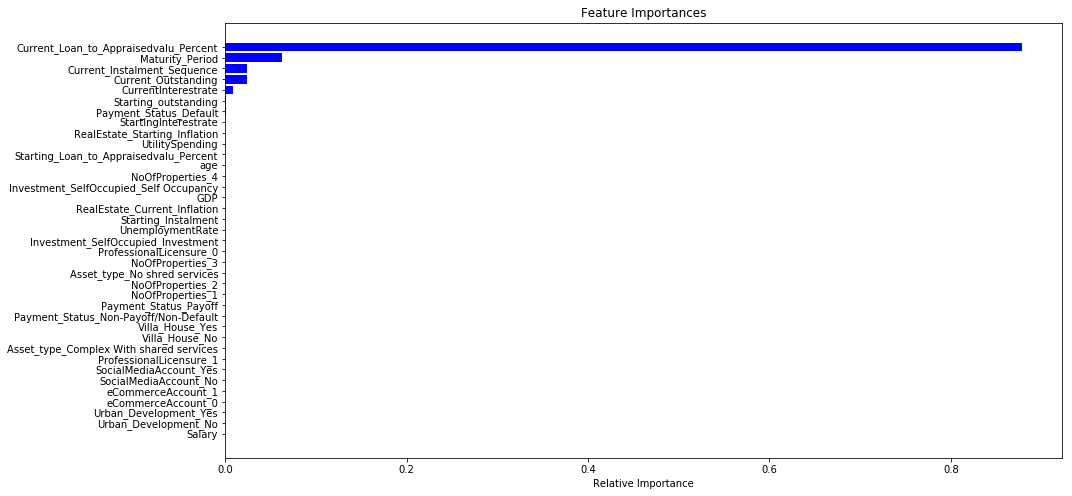

In [565]:
# ploting the graph for important features 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
features = X_train_final.columns
importances = regr_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# GridSearch Cross validation

In [566]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':list(range(3,15))}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train_final, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

C:\Users\Navi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8124525457024798 {'max_depth': 5}


In [567]:
#predicting on train data of grid search
y_grid_desion_train=tree_model.predict(X_train_final)
y_grid_desion_test=tree_model.predict(X_test_final)

In [568]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_grid_desion_test,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_grid_desion_train,y_true=y_train)))

Root Mean Square error of validation: 64.68868702710078
Root Mean Square error of train: 61.87198672048905


# Random forest 

In [569]:
# Random Forest algorithm
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500,n_jobs=-1)
#fitting random forest model to train data 
rfr1=rfr.fit(X_train_final,y_train)


In [570]:
#predicting on train data of random forest 
#prediction on train 
y_rfr_train_preds=rfr.predict(X=X_train_final)
#predictions on val 
y_rfr_test_preds=rfr.predict(X=X_test_final)
#predicting on test
y_rfr_sub_preds=rfr.predict(X=test_final)

In [571]:
#converting test prediction to dataframes 
y_rfr_sub_preds=pd.DataFrame(y_rfr_sub_preds)

In [572]:
#saving the test prediction for submission 
y_rfr_sub_preds.to_csv("submission2.csv",index=False)

In [573]:
#evaluating the model with RMSE
from sklearn import metrics
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_rfr_test_preds,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_rfr_train_preds,y_true=y_train)))

Root Mean Square error of validation: 63.50272566345241
Root Mean Square error of train: 23.298611352574323


# Tuning Random Forest

In [574]:
# Random Forest algorithm
# Training the Algorithm
rfr_tune = RandomForestRegressor(n_estimators=300,n_jobs=-1,max_depth=8,max_features="sqrt")
rfr_tune.fit(X_train_final,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [575]:
#predicting on train data of random forest tune
#prediction on train
y_rfr_train_preds_tune=rfr_tune.predict(X=X_train_final)
#predictions on val 
y_rfr_test_preds_tune=rfr_tune.predict(X=X_test_final)
#predictions on test
y_rfr_sub_preds_tune=rfr_tune.predict(X=test_final)

In [576]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_rfr_test_preds_tune,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_rfr_train_preds_tune,y_true=y_train)))

Root Mean Square error of validation: 66.27286690193175
Root Mean Square error of train: 62.15547533136631


In [577]:
#converting test prediction to dataframes
y_rfr_sub_preds_tune=pd.DataFrame(y_rfr_sub_preds_tune)

In [578]:
#saving the test prediction for submission
y_rfr_sub_preds_tune.to_csv("submission4.csv",index=False)

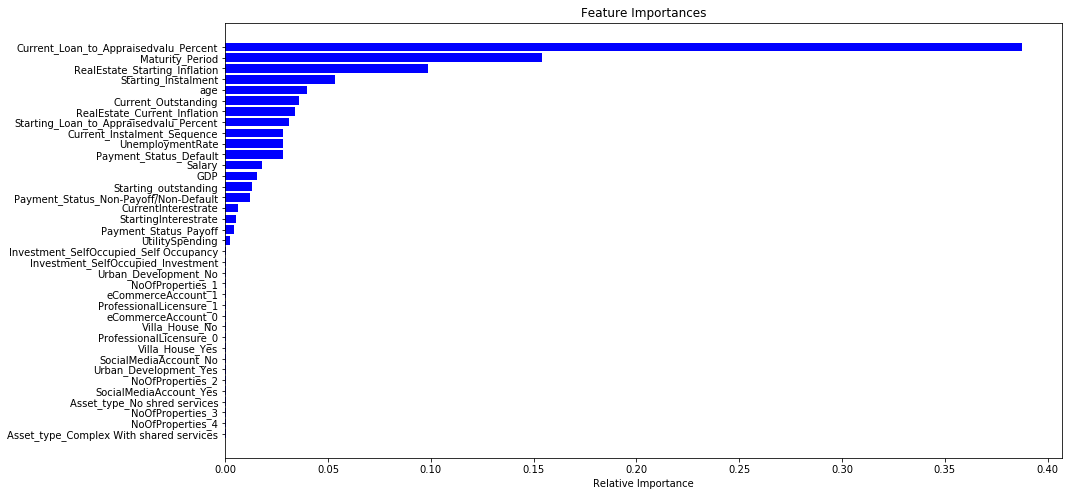

In [579]:
# ploting the graph for important features 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
features = X_train_final.columns
importances = rfr_tune.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 # Adaboost Model

In [580]:
#Ada boost model 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [581]:
#assining th model 
Adaboost_model = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=2),
    n_estimators=10,
    learning_rate=0.01)

#fitting models 
Adaboost_model.fit(X_train_final, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.01, loss='linear', n_estimators=10,
         random_state=None)

In [582]:
#predicting on train data of Ada boost model 
y_pred_ada_train=Adaboost_model.predict(X_train_final)
y_pred_ada_test=Adaboost_model.predict(X_test_final)

In [583]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_pred_ada_test,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_pred_ada_train,y_true=y_train)))

Root Mean Square error of validation: 75.27009283607485
Root Mean Square error of train: 74.64550567320649


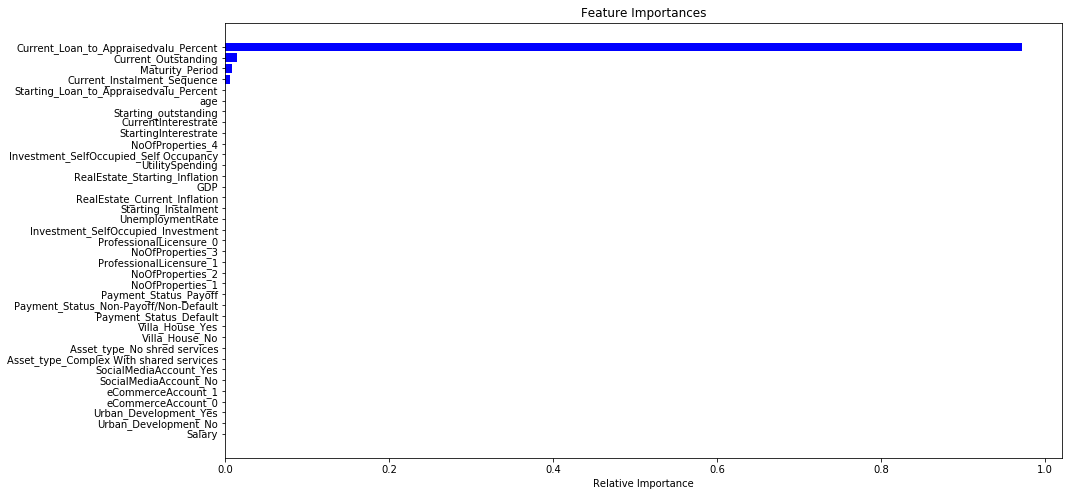

In [584]:
# ploting the graph for important features 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
features = X_train_final.columns
importances = Adaboost_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Adaboost_model GridSearch Cross Validation

In [585]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,150,200], 'learning_rate' : [0.1,0.5,0.9]}
clf = GridSearchCV(AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=2)), param_grid, n_jobs=4)
clf.fit(X=X_train_final, y=y_train)
ada_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

C:\Users\Navi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7791312518184833 {'learning_rate': 0.9, 'n_estimators': 100}


In [586]:
#predicting on train data of Ada boost model
y_pred_ada_train_tune=ada_model.predict(X_train_final)
y_pred_ada_test_tune=ada_model.predict(X_test_final)

In [587]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_pred_ada_test_tune,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_pred_ada_train_tune,y_true=y_train)))

Root Mean Square error of validation: 70.25673046794164
Root Mean Square error of train: 69.95136583751275


# xgb_

In [588]:
#XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [589]:
#assining the xgb model 
xgb = XGBRegressor(nthread=5,max_depth=4,learning_rate=0.03,n_estimators=150)
# fitting the model 
model_xgb= xgb.fit(X_train_final,y_train)

In [590]:
#predicting on train data of xgb model
y_pred_xgb_train = xgb.predict(X_train_final)
y__pred_xgb_test=xgb.predict(X_test_final)

In [591]:
#making train and test colums in same columns  
test_final = test_final[X_train_final.columns]

In [592]:
#predicting on test data of xgb model
y_xgb_sub_preds=xgb.predict(test_final)

In [593]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y__pred_xgb_test,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_pred_xgb_train,y_true=y_train)))

Root Mean Square error of validation: 64.48446599597955
Root Mean Square error of train: 61.54694993633053


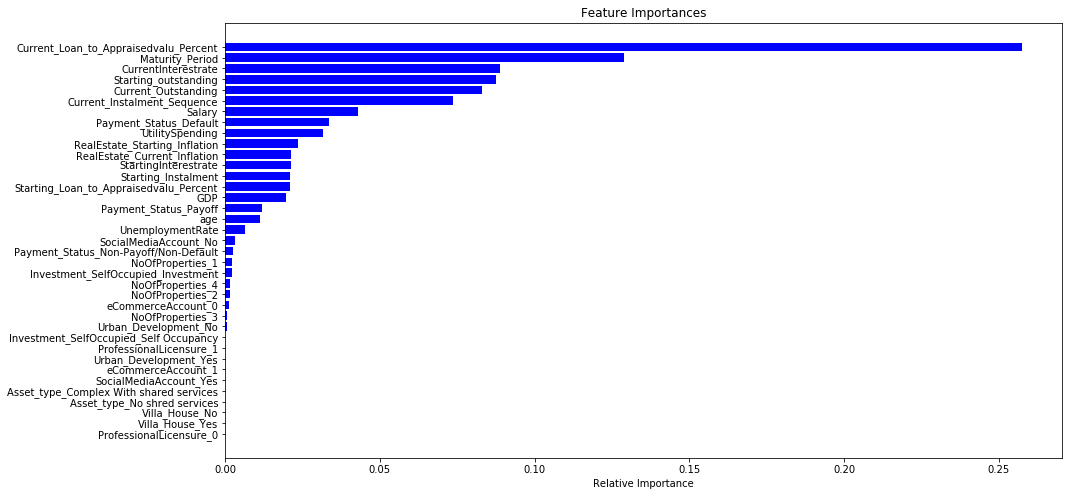

In [594]:
# ploting the graph for important features
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
features = X_train_final.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XG_Boost with Tuning

In [595]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb_Grid = xgb.XGBRegressor()
 
# Use a grid over parameters of interest
param_grid = { 
           "nthread":[4,5], 
           "max_depth" : [5, 10],
           "learning_rate" : [0.05,0.1, 0.2],
           "n_estimators": [100,200,250,300,350]
           }
 
xgb_grid_model = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid,cv=4)

In [596]:
#model fitting tha train data 
xgb_grid_model.fit(X_train_final,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'nthread': [4, 5], 'max_depth': [5, 10], 'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [100, 200, 250, 300, 350]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [597]:
#predicting on train data of xgb model
y_xgb_train_preds_tune=xgb_grid_model.predict(X=X_train_final)
y_xgb_test_preds_tune=xgb_grid_model.predict(X=X_test_final)

In [598]:
#predicting on test data of xgb model
y_xgb_sub_preds_tune=xgb_grid_model.predict(X=test_final)

In [599]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_xgb_test_preds_tune,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_xgb_train_preds_tune,y_true=y_train)))

Root Mean Square error of validation: 63.518109460178955
Root Mean Square error of train: 58.23179654919547


In [600]:
# converting the predictions in dataframe 
y_xgb_sub_preds_tune=pd.DataFrame(y_xgb_sub_preds_tune)

In [601]:
#saving th predictions in csv for submission 
y_xgb_sub_preds_tune.to_csv("submission612.csv",index=False)

# svm model

In [602]:
from sklearn import svm

In [603]:
model= svm.SVR(C=2,kernel="rbf")
model.fit(X_train_final,y_train)

C:\Users\Navi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [604]:
#predicting on train data of xgb model
y_train_svr=model.predict(X=X_train_final)
y_test_svr=model.predict(X=X_test_final)

In [605]:
#evaluating the model with RMSE
print("Root Mean Square error of validation:", np.sqrt(metrics.mean_squared_error(y_pred=y_test_svr,y_true=y_test)))
print("Root Mean Square error of train:", np.sqrt(metrics.mean_squared_error(y_pred=y_train_svr,y_true=y_train)))

Root Mean Square error of validation: 146.80185340493006
Root Mean Square error of train: 147.32379337808985
